In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [62]:
# Load RGB fire pixels from images
def load_fire_pixels(image_folder):
    fire_pixels_rgb = []
    image_paths = glob(os.path.join(image_folder, "*.jpg")) + glob(os.path.join(image_folder, "*.png"))
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pixels = img_rgb.reshape(-1, 3)
        fire_pixels_rgb.append(pixels)
    return np.vstack(fire_pixels_rgb)

# Convert to 12-channel color feature vector
def extract_color_features(rgb_pixels):
    img = rgb_pixels.reshape(-1, 1, 3)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).reshape(-1, 3)
    ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb).reshape(-1, 3)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab).reshape(-1, 3)
    color_features = np.hstack([rgb_pixels, hsv, ycbcr, lab])
    feature_names = ['R', 'G', 'B', 'H', 'S', 'V', 'Y', 'Cr', 'Cb', 'L', 'a', 'b']
    return color_features, feature_names

In [ ]:
# Perform PCA and visualize variance and feature importance
def pca_color_analysis(color_features, feature_names, n_components=6):
    scaler = StandardScaler()
    color_scaled = scaler.fit_transform(color_features)

    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(color_scaled)

    # Variance explained plot
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("PCA - Variance Explained by Components")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Feature loadings
    loadings = pd.DataFrame(pca.components_.T,
                            columns=[f'PC{i+1}' for i in range(n_components)],
                            index=feature_names)

    # Bar plot of absolute values for PC1
    abs_pc1 = loadings['PC1'].abs().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=abs_pc1.values, y=abs_pc1.index, palette='viridis')
    plt.title("Top Feature Contributions to PC1 (Absolute Loadings)")
    plt.xlabel("Contribution")
    plt.tight_layout()
    plt.show()

    return pca, loadings

In [51]:
data_path = "./gt_fire_imgs"
rgb_pixels = load_fire_pixels(data_path)
color_features, feature_names = extract_color_features(rgb_pixels)

In [52]:
scaler = StandardScaler()
color_scaled = scaler.fit_transform(color_features)
n_pc=4
pca = PCA(n_components=n_pc)
pca_components = pca.fit_transform(color_scaled)

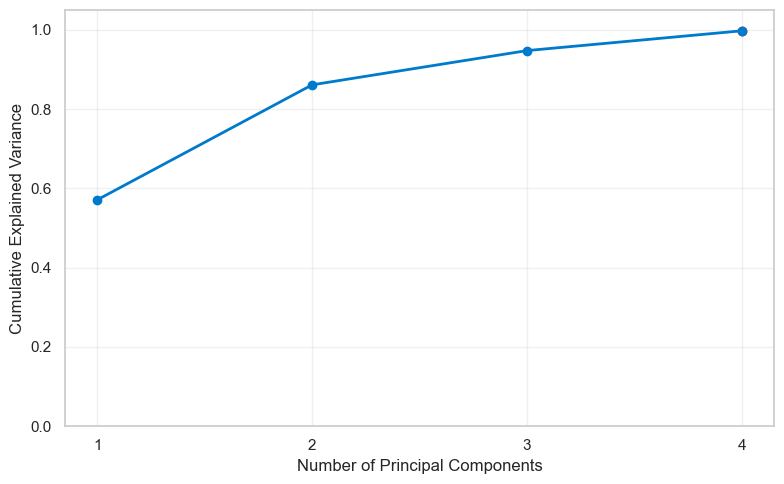

In [63]:
sns.set(style="whitegrid")

explained = np.cumsum(pca.explained_variance_ratio_)
components = range(1, len(explained) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, explained, marker='o', linestyle='-', color='#007acc', linewidth=2)

plt.scatter(components[-1], explained[-1], color='red')


plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(components)
plt.ylim(0, 1.05)
plt.grid(alpha=0.3)

plt.tight_layout()
#plt.savefig("PCA_variance_styled.png", dpi=300)
plt.show()


Only 3 or 4 principle components needed to explain all the variation in fire pixels.

In [64]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_pc)],
                            index=feature_names)
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False)
top_features_pc3 = loadings['PC3'].abs().sort_values(ascending=False)
top_features_pc4 = loadings['PC4'].abs().sort_values(ascending=False)

print("Top contributors to PC1:\n", top_features_pc1.head(12))
print("\nTop contributors to PC2:\n", top_features_pc2.head(12))
print("\nTop contributors to PC3:\n", top_features_pc3.head(12))
print("\nTop contributors to PC4:\n", top_features_pc4.head(12))


Top contributors to PC1:
 Y     0.374458
G     0.372575
L     0.367003
a     0.329220
Cr    0.317856
B     0.315043
S     0.299766
V     0.256189
R     0.254271
H     0.224309
b     0.081947
Cb    0.020785
Name: PC1, dtype: float64

Top contributors to PC2:
 Cb    0.515220
b     0.509379
R     0.329597
V     0.327919
S     0.316102
B     0.280230
Cr    0.202256
L     0.139929
Y     0.096514
G     0.092815
H     0.045257
a     0.000798
Name: PC2, dtype: float64

Top contributors to PC3:
 a     0.440273
H     0.428643
R     0.405714
V     0.401908
Cr    0.353211
Cb    0.235797
B     0.205960
b     0.181776
S     0.166001
G     0.079477
L     0.061952
Y     0.052533
Name: PC3, dtype: float64

Top contributors to PC4:
 H     0.873937
a     0.302276
Cr    0.242057
G     0.138166
Cb    0.134603
V     0.116894
R     0.115022
b     0.103439
Y     0.074944
L     0.067735
B     0.033047
S     0.013153
Name: PC4, dtype: float64


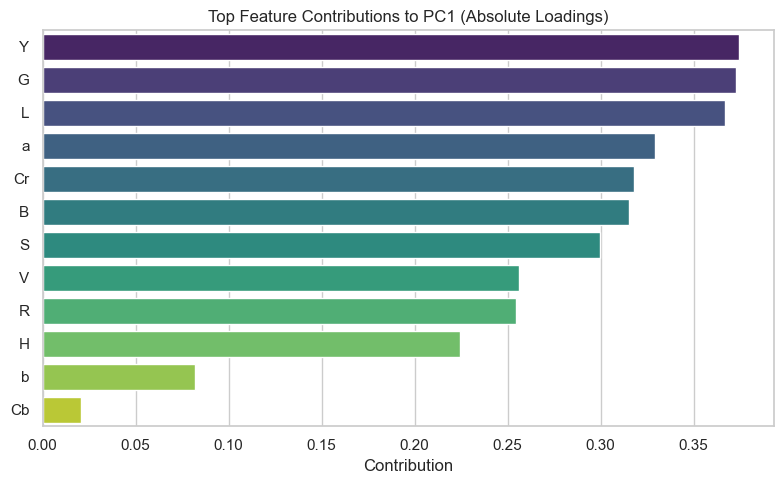

In [65]:
abs_pc1 = loadings['PC1'].abs().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=abs_pc1.values, y=abs_pc1.index, palette='viridis')
plt.title("Top Feature Contributions to PC1 (Absolute Loadings)")
plt.xlabel("Contribution")
plt.tight_layout()
plt.show()